# Preparation of KNMI Data for the prediction model

In [25]:
import pandas as pd
import shapefile
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import datetime
from shapely.geometry import Polygon
import numpy as np
import os

## Creation of a polygon grid

In [3]:
Rioleringsdeelgebied=gpd.read_file("C:/Users/20172648/Desktop/aa-en-maas_sewer_shp_WGS84/Rioleringsdeelgebied_WGS84.shp")
Rioleringsdeelgebied.head()

,RGDIDENT,TYPRGD,NAAMRGD,RGDID,GEOMETRIE_,GEOMETRIE1,geometry
0,CUI-CUI-BEI,1,Beijerd en 't Riet,316,0.0,0.0,"POLYGON ((5.871789942952855 51.73142778398143,..."
1,HEL-HEL-AKI,2,30. Akkers I,792,0.0,0.0,"POLYGON ((5.639777930999652 51.45550664890908,..."
2,HER-ROS-OVE,1,gebied E; Overlaet E,97,0.0,0.0,"POLYGON ((5.369862763101162 51.72400915103489,..."
3,HER-HER-ORP,1,Geb. 8 Orthenpoort,539,0.0,0.0,"POLYGON ((5.303665672444452 51.69769499520089,..."
4,HER-BRA-BRA,2,de Brand,770,0.0,0.0,"POLYGON ((5.366968395013955 51.6833809916705, ..."


,RGDIDENT,TYPRGD,NAAMRGD,RGDID,GEOMETRIE_,GEOMETRIE1,geometry,x,y
3,HER-HER-ORP,1,Geb. 8 Orthenpoort,539,0.0,0.0,"POLYGON ((5.303665672444452 51.69769499520089,...",5.301593,51.699136
9,HER-HER-TOL,1,geb. 6c Carolushof,543,0.0,0.0,"POLYGON ((5.305530586673107 51.69227701994136,...",5.303842,51.692047
16,HEU-DRU-WAR,3,Wartsila,297,0.0,0.0,"POLYGON ((5.153577043237233 51.69637533371871,...",5.150843,51.694462
27,HER-HER-SVL,2,Sportpark de Vliert(Sportiom),533,0.0,0.0,"POLYGON ((5.336644695444306 51.70478719903669,...",5.329350,51.701318
31,HER-HER-VUG,1,Geb. 12 Vughterpoort,548,0.0,0.0,"POLYGON ((5.293400572151597 51.67667953896254,...",5.292908,51.679716


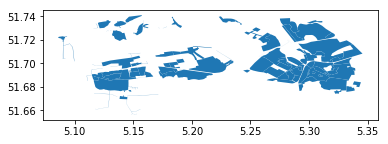

In [13]:
rio_db = pd.read_excel("C:/Users/20172648/Desktop/sewer_model/20180717_dump riodat rioleringsdeelgebieden_DB.xlsx", skiprows=9)
list_codes = rio_db['Code'].tolist()
rio_db.head()
# Made a list of the Rioleeringsdeelgebieden we focus on.
select_deelgebied = Rioleringsdeelgebied[pd.DataFrame(Rioleringsdeelgebied['RGDIDENT']).isin(list_codes).any(1)]
# Selected those areas in our shapefile rioleeringsdeelgebieden with the list from rioleeringsdeelgebied.db
gdf = select_deelgebied
gdf.plot()
gdf = gdf.to_crs({'init': 'epsg:4326'})
# Creating a centroid for readability
gdf['x'] = gdf.centroid.x
gdf['y'] = gdf.centroid.y
gdf.head()

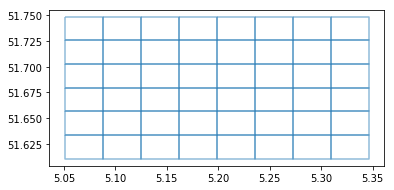

In [7]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
points = gdf

# Out of the full grid in the KNMI data we only need 6x8 cells.
xmin,ymin,xmax,ymax = points['geometry'].total_bounds
# length and wide are equal to the size of a cell in the grid of the KNMI data.
length = 0.023000000000
wide = 0.037000000000

# Setting the floats to the minimum and maximum coordinates of the grids we need for our Selectdeelgebied
# Added floats here to make sure the lines and grids coincide with actual latitude/longitude lines

cols = list(np.arange(float(5.0505), float(5.3465), wide)) 
rows = list(np.arange(float(51.6335), float(51.7485), length))
rows.reverse()

polygons = []
for x in cols:
    for y in rows:
        polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y-length), (x, y-length)]))

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grid_coordinates_moved.shp")
r = gpd.read_file("grid_coordinates_moved.shp")
# saved the grid for further use in Qgis
r.boundary.plot(alpha=0.5)

The Grid and Selectdeelgebied have been intersected in Qgis, area has been added with the field-calculator which calculated the area for each interesection.

Populating the interactive namespace from numpy and matplotlib


C:\Users\20172648\AppData\Local\conda\conda\envs\my_root\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Polygon', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


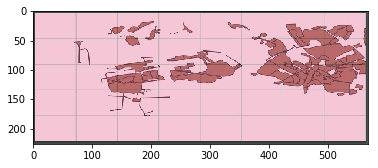

In [8]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img2=mpimg.imread('QGIS GRID.png')
imgplot = plt.imshow(img2)
plt.show()
# Grid and selectdeelgebied over eachother

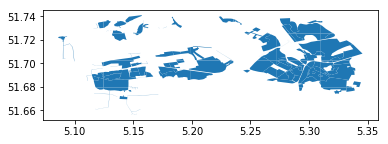

In [19]:
# Selectdeelgebied interesected by the grid 
intersection=gpd.read_file("final_intersection.shp")
intersection.plot()

In [20]:
# FID here is the ID of the grid, starting from 0 which is the top left and 47 which is the bottom right
intersection.head()

,RGDIDENT,TYPRGD,NAAMRGD,RGDID,GEOMETRIE_,GEOMETRIE1,FID,Area,geometry
0,HER-HER-ORP,1,Geb. 8 Orthenpoort,539,0.0,0.0,38,190095.706,"POLYGON ((5.303665672444452 51.69769499520089,..."
1,HER-HER-TOL,1,geb. 6c Carolushof,543,0.0,0.0,38,28559.526,"POLYGON ((5.305530586673107 51.69227701994136,..."
2,HEU-DRU-WAR,3,Wartsila,297,0.0,0.0,14,161710.799,"POLYGON ((5.153577043237233 51.69637533371871,..."
3,HER-HER-SVL,2,Sportpark de Vliert(Sportiom),533,0.0,0.0,43,62935.683,"POLYGON ((5.336644695444306 51.70478719903669,..."
4,HER-HER-SVL,2,Sportpark de Vliert(Sportiom),533,0.0,0.0,44,244851.275,"POLYGON ((5.334575818382014 51.70250000000001,..."


## Function that matches each area in intersection to the correct rain cell in the KNMI data by matching on FID.

In [23]:
# opening an .asc file as 2d array
def clean_file(file):
    array2D = []
    with open(file) as f:
        for line in f.readlines()[7:]:
                array2D.append(line.split(' '))

    #load 2d array into a dataframe, string values in each cell
    knmi = pd.DataFrame(array2D)

    # clean the file, remove spaces, and add longitutde and latitude as index and column names for readability
    knmi = knmi.drop(knmi.columns[0], axis = 1)
    knmi.columns = np.arange(-0.018500000000, 11.0815, 0.037)

    knmi = knmi.replace('\n',' ', regex=True) 
    latitude = np.arange(49.0115, 55.9115, 0.023)
    latitude_index = latitude[::-1]
    knmi = knmi.set_index(latitude_index)

    # Now lets select the the longitutde and latitude we need (same latitude and longitude as in the grid)
    knmi = knmi.loc[:, 5.0405:5.3105]
    knmi = knmi.loc[51.7486:51.625]
    
    # Negative values are errors in data, changing data to floats and setting negatives to 0
    knmi = knmi.astype(float)
    knmi = knmi[knmi >= 0]
    knmi.fillna(0, inplace=True)
    
    # Code used to read the file name and extract the timestamp in the string name  
    timestamps = file.split("_")
    eind = timestamps[-1]
    eind = eind[:-4]
    begin = timestamps[-2]
    
    # now lets make a list of all the values, indexed from 0-47 which corresponds to intersection['FID']
    # intersection['FID'] also is indexed 0-47      
    r = []
    shape = list(knmi.shape)
    for row in range(0,shape[0]):
        for col in range(0, shape[1]):
            r.append(float(knmi.iloc[row,col]))

    # taking a subset by each unique area code, and multiplying them by the corresponding grid cell in the list (r)
    # then we sum them up, since we wanted to get the total rainfall of each area code
    intersection=gpd.read_file("C:/Users/20172648/Desktop/sewer_data/final_intersection.shp")
    rainfall = []
    rgdident = []
    naamrgd = []
    measurement_begin = []
    measurement_eind = []
    for i in intersection['RGDIDENT'].unique():
        subset = intersection[intersection['RGDIDENT']== i] # make a subset df for each unique area code
        total = 0
        for index, row in subset.iterrows():
            ID = row['FID']
            x = row['Area'] * r[ID]/1000 # times the corresponding cell from knmi rainfall predictions
            code = row['RGDIDENT']
            total = total + x # total rain for the area
        rainfall.append(total)
        rgdident.append(i)
        naamrgd.append(subset['NAAMRGD'].unique())
        measurement_begin.append(begin)
        measurement_eind.append(eind)
    dict_df = {"Rainfall": rainfall, "RGDIDENT": rgdident, "NAAMRGD": naamrgd, 'measurement_begin': measurement_begin, "measurement_eind": measurement_eind}
    knmi_df_new = pd.DataFrame(data=dict_df)
    
    return knmi_df_new
    # returns a dataframe with the total rain for each area code

In [ ]:
# attempt to make a csv from each asc file, script made by Jaymon but altered to work for this function
# Target directory is:
folder = 'rain_grid_prediction'

current_dir = os.path.dirname(os.path.abspath("__file__"))
    
folder_path = current_dir + "\\" + folder
    
script_test = 0
    
if os.path.exists(folder_path):
    df = pd.DataFrame()   
    script_test = 1
# Running the script for every file and adding summing the dataframes.       
    for file in os.listdir(folder_path):
        if 'overall' not in file:
            print('converting: ' + file + ' to dataframe')
            file = folder_path + '\\' + file
            knmi_df_new = clean_file(file)
            df_temp = knmi_df_new
            df = pd.concat([df, df_temp])

df.to_csv(folder_path + '\\' + folder + '_overall.csv', index=False, sep=',')

if script_test != 1:
    print('No folder with data found to extract. Check script file location.')
    
else:
    print('Converting file...')